<a href="https://colab.research.google.com/github/du6293/project/blob/main/%EC%8B%AC%ED%99%9411_%EB%B6%84%EB%A5%98(%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5)_%EA%B5%B0%EC%A7%91%ED%99%94(%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5)_%ED%95%99%EC%83%9D%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.환경설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

matplotlib로 시각화 할 때 한글이 나오도록 하기 위해 필요함

In [ ]:
# 나눔바른고딕 폰트 설치 - [런타임 다시 시작]되면 폰트를 다시 설치해야 한글이 보입니다.
!apt-get install fonts-nanum

In [ ]:
# 한글폰트 설정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
plt.rcParams['font.family'] = "NanumBarunGothic"

matplotlib로 시각화 할 때 x축 y축 레이블에 음수('-') 표시가 나오도록 할 때 필요함

In [ ]:
# 마이너스(음수)부호 설정
plt.rc("axes", unicode_minus = False)

# 1.분류 예측 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics 

## kNN(최근접이웃) 알고리즘

- KNeighborsClassifier() : 분류기 객체 생성
- fit() : 학습
- predict() : 예측
- kneighbors() : 이웃데이터(neighbor) 반환받기

### [1] 닥스훈트와 진돗개의 분류

#### (1) 데이터 수집 및 시각화

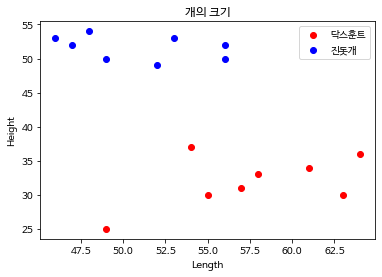

In [ ]:
# 데이터세트를 출력하는 함수
def draw_data():
    plt.scatter(dach_length,dach_height,c='r',label='닥스훈트')
    plt.scatter(jin_length,jin_height,c='b',label='진돗개')

    plt.title('개의 크기')
    plt.legend(loc='upper right')

    plt.ylabel("Height")
    plt.xlabel("Length")

# 닥스훈트의 길이와 높이 데이터
dach_length=[55,57,64,63,58,49,54,61]
dach_height=[30,31,36,30,33,25,37,34]

# 진돗개의 길이와 높이 데이터
jin_length=[56,47,56,46,49,53,52,48]
jin_height=[52,52,50,53,50,53,49,54]

draw_data()

레이블이 없는 데이터를 추가로 등록해 산점도로 표시한 후 분류예측

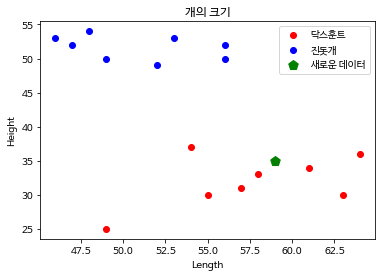

In [ ]:
draw_data()        # 훈련에 사용된 데이터

unseen_length=[59]     # 새로운 데이터
unseen_height=[35]

# 새로운 데이터를 앞에서 표시한 전체 데이터 산점도에 추가해 보자
# marker='p', c='g', label='새로운 데이터'








#### (2) 데이터를 학습에 사용할 수 있는 형태로 만든다

In [ ]:
# 닥스훈트는 0번 레이블(d_label, 정답)
d_data = np.column_stack((dach_length,dach_height))
d_label = np.zeros(len(d_data))

# 진돗개는 1번 레이블(j_label, 정답)
j_data = np.column_stack((jin_length,jin_height))
j_label = np.ones(len(j_data))

# 훈련에 사용되지 않은 새로운 데이터
unseen_data = [[59,35]]

# 모든 데이터를 합해 하나의 특성(feature) 테이블과 target을 만든다
X_data = np.concatenate((d_data, j_data))
y_label = np.concatenate((d_label, j_label))
print (X_data,'\n', y_label)

[[55 30]
 [57 31]
 [64 36]
 [63 30]
 [58 33]
 [49 25]
 [54 37]
 [61 34]
 [56 52]
 [47 52]
 [56 50]
 [46 53]
 [49 50]
 [53 53]
 [52 49]
 [48 54]] 
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]


##### draw_train(X_data): 훈련데이터 그리는 함수

In [ ]:
# 데이터세트를 출력하는 함수
import numpy as np
def draw_train(X_data):
    data = np.array(X_data)
    plt.scatter(data[:,0][0:8], data[:,1][0:8], c='r', label='닥스훈트')
    plt.scatter(data[:,0][8:], data[:,1][8:], c='b', label='진돗개')

    plt.title('개의 크기')
    plt.legend(loc='upper right')

    plt.ylabel("Height")
    plt.xlabel("Length")

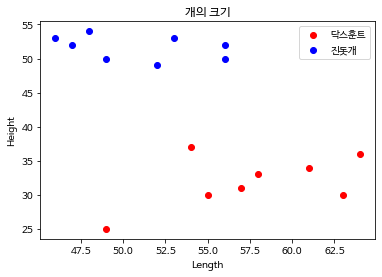

In [ ]:
draw_train(X_data)

#### (3) k-NN 분류기 실행

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

dog_classes = {0:'닥스훈트',1:'진돗개'}

# k값을 지정하고, KNeighborsClassifier(), fit()을 차례로 호출해 k-NN 분류기를 만든다
# feature는 X_data, target은 y_label에 저장되어 있다







#### (4) 새로운 데이터로 예측

In [ ]:
# predict()를 사용해 새로운 데이터(unseen_data)를 분류하고 결과를 출력해 보자





데이터 [[59, 35]]   판정결과 : 닥스훈트


#### [참고] kNN에서 이웃한 데이터를 얻는 코드
- kneighbors(X=None, n_neighbors=None, return_distance=True)

In [ ]:
# kneighbors()를 이용해 이웃데이터를 받환받아 출력해 보자







distances : [[2.23606798 2.23606798 4.47213595]] indexes : [[4 7 1]]
neihgbors:  [[[58 33]
  [61 34]
  [57 31]]]


##### draw_unseen(unseen_data): 새로운 데이터 그리는 함수

In [ ]:
# unseen_data를 훈련데이터와 함께 산점도에 표시하는 함수
def draw_unseen(unseen_data):
    plt.scatter(unseen_data[0][0], unseen_data[0][1], s=100, marker='p', c='green', label='새로운 데이터')

##### draw_neighbor(X_data, index, k): neighbor 그리는 함수

In [ ]:
# neighbor로 산점도 그리는 함수
def draw_neighbor(X_data, index, k):
    print(f'k={k}  index {index}]')

    # 범례를 표시하고자 하는 경우에는 이처럼 한다
    data = np.array(X_data)
    plt.scatter(data[index[0]][:,0], data[index[0]][:,1],
                s=60, marker='D', c='orange', label='이웃')
    plt.legend(loc=1)


    # 범례를 표시하지 않을 경우에는 아래와 같이 해도 된다
    # for i in index[0]:
    #     # print(X_data[i][0],X_data[i][1])
    #     plt.scatter(X_data[i][0], X_data[i][1], s=60, marker='D', c='orange')

k=3  index [[4 7 1]]]


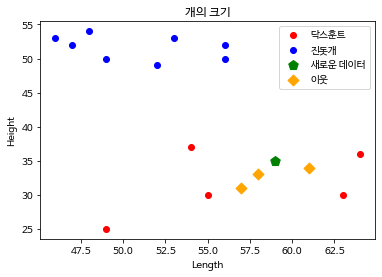

데이터 [[59, 35]]   판정결과 : 닥스훈트


In [ ]:
# 훈련데이터세트, 새로운 데이터, 이웃데이터를 모두 한 플롯에 그리고
# 새로운 데이터와 판정 결과를 출력하시오










#### 문제 1: 새로운 데이터로 예측해보자

데이터 [[52, 42]]   판정결과 : 닥스훈트
distances : [[ 5.38516481  7.          8.54400375  8.94427191 10.77032961]] indexes : [[ 6 14 12 10  8]]
k=5  index [[ 6 14 12 10  8]]]


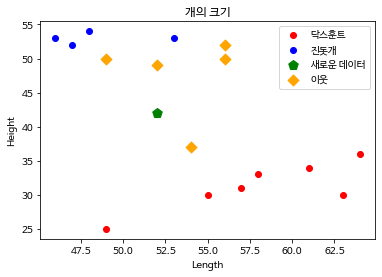

In [ ]:
# 또 다른 데이터에 대해서 k=5일 때 kNN 분류기를 만들고, 결과를 시각화하시오
unseen_data = [[52, 42]]













In [ ]:
# k를 1,3,5,7에 대해서도 분류기를 만들고 판정 결과를 출력하시오






k=1 데이터 [[52, 42]]  판정 결과:닥스훈트
k=3 데이터 [[52, 42]]  판정 결과:진돗개
k=5 데이터 [[52, 42]]  판정 결과:진돗개
k=7 데이터 [[52, 42]]  판정 결과:진돗개


#### 문제 2: H반은 이 실습 생략함


---


진돗개와 닥스 훈트의 분류문제를 다루는 kNN 알고리즘에 대하여 9.2절에 나타난 것과 동일한 진돗개, 닥스훈트 데이터를 사용하여 다음 문제에 도전해 보자. 

1. 새 데이터 [[60, 32]]를 산점도에서 녹색 점으로 표시해보자 .

2. k = 1,5,9 일 때 판정 결과를 출력해보자 

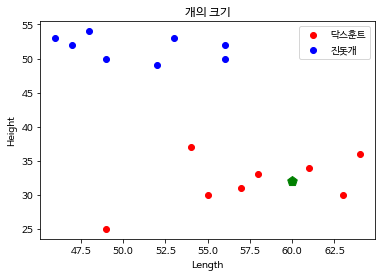

In [ ]:
unseen_data = [[60,32]]






k=1 데이터 [[60, 32]]  판정 결과:닥스훈트
k=5 데이터 [[60, 32]]  판정 결과:닥스훈트
k=9 데이터 [[60, 32]]  판정 결과:닥스훈트


k=9  index [[ 4  7  1  3  0  2  6  5 10]]]


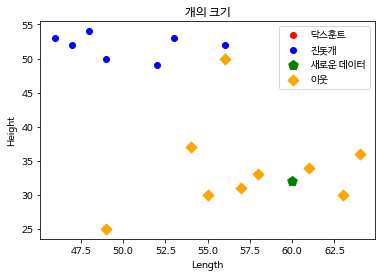

In [ ]:
# 마지막 경우인 k=9일 때 이웃(neighbor)과 함께 시각화해보자






### [2] 붓꽃 데이터 분류

#### (1) 데이터 가져오기

In [ ]:
# 사이킷런에서 제공하는 데이터를 활용해보자. ndarray 형태로 읽힌다. 
from sklearn.datasets import load_iris
iris=load_iris()

#### (2) 데이터 살펴보기



```
print("처음 3개의 데이터:", __________) # 처음 3개만 출력해 보자
print("데이터의 형태:", __________)
print("데이터의 속성:", __________)
print("레이블값:", __________)
```



In [ ]:
# 다음 내용을 출력해보자

print("처음 3개의 데이터:", iris.data[:3]) # 처음 3개만 출력해 보자
print("데이터의 형태:", iris.data.shape)
print("데이터의 속성:", iris.feature_names)
print("레이블값:", iris.target)  # 0:setosa ,1:versicolor, 2: virginica



처음 3개의 데이터: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
데이터의 형태: (150, 4)
데이터의 속성: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
레이블값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# 데이터를 활용하기 쉽게 pandas 형태로 바꾸자
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [ ]:
# 처음 3개만 값을 살펴보자
iris_df.values[0:3]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ]])

#### (3) 데이터 전처리

In [ ]:
# kNN에 넣기 좋도록 데이터를 분리하자
# 4개의 feature는 X에 저장하고, target은 y에 저장한다

X = iris_df.iloc[:,:4]  # feature
y = iris_df.iloc[:,-1]  # target
print(X)
print(y)



     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

#### (4) train-test 세트로 나누고 학습하자

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics  # 평가점수

def iris_knn (X, y, k):
    # 데이터셋에서 임의로 트레이닝셋과 테스트셋을 7:3으로 분리
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

    # kNN 적용
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)  # 학습

    # 예측
    y_pred = knn.predcict(X_test)
    # 실제값과 예측한 값을 비교해서 정확도를 점수화하여 반환
    return knn, metrics.accuracy_score(y_test,y_pred)  # y_test : 실제값  y_pred : 내가 측정한 값. 1에 가까워질수록 정확하게 예측한 것

In [ ]:
# k값이 3일 때 iris를 분류하고 정확도를 출력하자

k = 3
knn_df, scores = iris_knn(X,y,k)
print(f'neighbor가 {k:2d}일 때 정확도:{scores:.3f}')

AttributeError: ignored

In [ ]:
for k in [1,5,10,20,30]:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn_df, scores = iris_knn(X,y,k)
  print(f'neighbor가 {k:2d}일 때 정확도: {scores : .3f}')

AttributeError: ignored

#### 문제 3: n-neoghbor가 1, 5, 10, 20, 30일 때의 정확도값을 측정해보자.


In [ ]:
for k in [1,5,10,20,30]:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn_df, scores = iris_knn(X,y,k)
  print(f'neighbor가 {k:2d}일 때 정확도: {scores : .3f}')




AttributeError: ignored

#### (5) 새로운 데이터를 분류하자

In [ ]:
# 새로운 데이터를 DataFrame 형태로 생성해서 위의 kNN 분류기에 넣는다
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

X_df = [[4, 2, 1.3, 0.4], 
        [4, 3, 3.2, 2.2]] 
unseen_X_df = pd.DataFrame(X_df)

y_df = knn_df.predict(unsen_X_df)

for i in range(unseen_X_df.shape[0]):
    print('{}  특성을 가지는 품종: {}'.format(unseen_X_df.iloc[i,:].tolist(), classes[y_df[i]]))

NameError: ignored

In [ ]:
# ndarray 형태로 데이터를 읽어서 위와 같은 과정을 직접 해보자
# 데이터 가져오기 -> 분류기 만들기 -> 새로운 데이터 분류하기 -> 결과 출력하기

k = 3
iris = load_iris()

# 분류기 만들기
knn_np = KNighborsClassifier(n_neighbors = k)
knn_np.fit(iris.data, iris.target)


# 새로운 데이터
X_np = [[4, 2, 1.3, 0.4], 
        [4, 3, 3.2, 2.2]] 

# 새로운 데이터에 대해 분류하기
y_np = knn_np.predict(X_np)

# 결과 출력하기
for i in range(len(X_np)):
    print(f'{X_np[i]}  특성을 가지는 품종: {classes[y_np[i]]}')

[4, 2, 1.3, 0.4]  특성을 가지는 품종: setosa
[4, 3, 3.2, 2.2]  특성을 가지는 품종: versicolor


#### (6) 결과 분석 (혼동행렬)

In [ ]:
# 전체 데이터를 넣고 score를 살펴보자
y_pred_all = knn_np.predict(iris.data)
scores = metrics.accuracy_score(iris.target, y_pred_all)

print (f"n_neighbor가 {k:2d}일 때 정확도: {scores:.3f}")

NameError: ignored

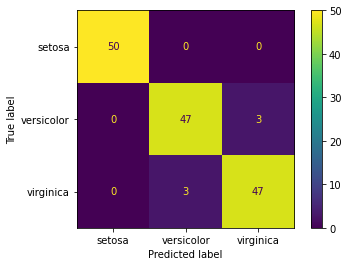

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_pred_all, iris.target)
print(conf_mat)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['setosa', 'versicolor', 'virginica'])
disp.plot()
plt.show()

### 실습 1: 펭귄 분류

---

다음은 극지 생물학자가 수집한 펭귄의 종류와 키, 몸무게이다. 각 종에대하여 8개의 샘플을 표시하였으며, 아래 표에서 키의 단위는 cm, 몸무게의 단위는 kg이다. 


* 황제펭귄의 키와 몸무게
>e_height = [90, 98, 85, 83, 73, 97, 93, 80]<br>
e_weight = [36.2, 39.1, 30.4, 33.6, 22.9, 37.3, 34.2, 31.1]

* 젠투펭귄 키와 몸무게
>g_height = [55, 65, 67, 78, 81, 83, 63, 77]<br>
g_weight = [9.6, 10.7, 8.9, 16.3, 18.0, 17.3, 5.9, 16.1]

* 바위뛰기펭귄 키와 몸무게
>r_height = [44, 48, 58, 41, 46, 57, 41, 45]<br>
r_weight = [3.5, 4.1, 4.9, 3.0, 4.8, 5.3, 3.6, 3.8]


1. k-NN알고리즘을 이용하여 분류를 수행할 것이다. 이를 위하여 펭귄의 키와 몸무게를 [90,36.2] 식으로 묶어서 다차원 배열로 출력하여라. 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 황제펭귄의 키와 몸무게
e_height = [90, 98, 85, 83, 73, 97, 93, 80]
e_weight = [36.2, 39.1, 30.4, 33.6, 22.9, 37.3, 34.2, 31.1]

# 젠투펭귄 키와 몸무게
g_height = [55, 65, 67, 78, 81, 83, 63, 77]
g_weight = [9.6, 10.7, 8.9, 16.3, 18.0, 17.3, 5.9, 16.1]

# 바위뛰기펭귄 키와 몸무게
r_height = [44, 48, 58, 41, 46, 57, 41, 45]
r_weight = [3.5, 4.1, 4.9, 3.0, 4.8, 5.3, 3.6, 3.8]

ep = np.column_stack([e_height,e_weight])
gp = np.column_stack([g_height,g_weight])
rp = np.column_stack([r_height,r_weight])


2. 넘파이의 concatenate()함수를 사용하여 이 세종의 다차원 배열을 차례로 연결하여 하나의 넘파이배열인 penguins를 만들고 출력하여라. 


In [ ]:
penguins=np.concatenate((ep,gp,rp), axis=0)
print(penguins)

[[90.  36.2]
 [98.  39.1]
 [85.  30.4]
 [83.  33.6]
 [73.  22.9]
 [97.  37.3]
 [93.  34.2]
 [80.  31.1]
 [55.   9.6]
 [65.  10.7]
 [67.   8.9]
 [78.  16.3]
 [81.  18. ]
 [83.  17.3]
 [63.   5.9]
 [77.  16.1]
 [44.   3.5]
 [48.   4.1]
 [58.   4.9]
 [41.   3. ]
 [46.   4.8]
 [57.   5.3]
 [41.   3.6]
 [45.   3.8]]


3. 황제펭귄 젠투펭귄, 바위뛰기펭귄의 레이블을 각각 0,1,2 로 하여 레이블을 붙여라.

In [ ]:
labels=[0]*len(ep)+[1]*len(gp)+[2]*len(rp)
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]


4. 다음과 같은 새로운 펭귄의 데이터 A,B,C,D,E 에 대해 n-neighbor를 각각 1,2,3,4,5 로 하여 k-NN알고리즘으로 분류하여라. 

```
A = [[75, 23.1]]
B = [[74, 16.6]]
C = [[56, 5.4]]
D = [[50, 5.3]]
E = [[89, 30.1]]
```

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

penguine_classes = {0:'황제펭귄', 1:'젠투펭귄', 2:'바위뛰기펭귄'} 

A = [[75, 23.1]]
B = [[74, 16.6]]
C = [[56, 5.4]]
D = [[50, 5.3]]
E = [[89, 30.1]]

# 데이터를 어떻게 분류하는가를 보여주는 함수를 만들어 봅니다
def show_classifier_result(data,label):
    print("========================")
    for k in range(1,6):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(penguins, labels)
        y_pred = knn.predict(data)
        print(label,': n_neighbors가', k,'일때 :', penguine_classes[y_pred[0]])

show_classifier_result(A,'A')    
show_classifier_result(B,'B')   
show_classifier_result(C,'C')   
show_classifier_result(D,'D')
show_classifier_result(E,'E')   


A : n_neighbors가 1 일때 : 황제펭귄
A : n_neighbors가 2 일때 : 황제펭귄
A : n_neighbors가 3 일때 : 젠투펭귄
A : n_neighbors가 4 일때 : 젠투펭귄
A : n_neighbors가 5 일때 : 젠투펭귄
B : n_neighbors가 1 일때 : 젠투펭귄
B : n_neighbors가 2 일때 : 젠투펭귄
B : n_neighbors가 3 일때 : 젠투펭귄
B : n_neighbors가 4 일때 : 젠투펭귄
B : n_neighbors가 5 일때 : 젠투펭귄
C : n_neighbors가 1 일때 : 바위뛰기펭귄
C : n_neighbors가 2 일때 : 바위뛰기펭귄
C : n_neighbors가 3 일때 : 바위뛰기펭귄
C : n_neighbors가 4 일때 : 젠투펭귄
C : n_neighbors가 5 일때 : 바위뛰기펭귄
D : n_neighbors가 1 일때 : 바위뛰기펭귄
D : n_neighbors가 2 일때 : 바위뛰기펭귄
D : n_neighbors가 3 일때 : 바위뛰기펭귄
D : n_neighbors가 4 일때 : 바위뛰기펭귄
D : n_neighbors가 5 일때 : 바위뛰기펭귄
E : n_neighbors가 1 일때 : 황제펭귄
E : n_neighbors가 2 일때 : 황제펭귄
E : n_neighbors가 3 일때 : 황제펭귄
E : n_neighbors가 4 일때 : 황제펭귄
E : n_neighbors가 5 일때 : 황제펭귄


5. 이 그래프를 산포도 그래프로 나타내보자. 황제헹귄은 붉은색의 동그라미, 젠트펭귄은 파란색의 세모, 바위뛰기펭귄은 녹색 네모로 나타내고 A,B,C,D,E 데이터를 함께표시해보자. 

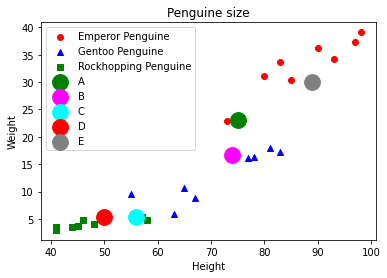

In [ ]:
plt.scatter(e_height, e_weight, c='red', label='Emperor Penguine')
plt.scatter(g_height, g_weight, c='blue', marker = '^', label='Gentoo Penguine')
plt.scatter(r_height, r_weight, c='green', marker = 's', label='Rockhopping Penguine')

A = [[75, 23.1]]
B = [[74, 16.6]]
C = [[56, 5.4]]
D = [[50, 5.3]]
E = [[89, 30.1]]

plt.scatter(A[0][0], A[0][1], s=250, c='green', label='A')
plt.scatter(B[0][0], B[0][1], s=250, c='magenta', label='B')
plt.scatter(C[0][0], C[0][1], s=250, c='cyan', label='C')
plt.scatter(D[0][0], D[0][1], s=250, c='red', label='D')
plt.scatter(E[0][0], E[0][1], s=250, c='gray', label='E')

plt.xlabel('Height')              
plt.ylabel('Weight')              
plt.title("Penguine size")
plt.legend(loc='upper left')
plt.savefig("penguine.png", dpi=600)

# 2.군집화

## k-Means

### [1] 게임 고객 군집화

#### (1) 데이터 가져오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
game_usage = pd.read_csv('game_usage.csv')
game_usage.head(3)

,time spent,game level
0,39,944
1,55,705
2,29,757


In [ ]:
game_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   time spent  100 non-null    int64
 1   game level  100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


#### (2) 데이터 살펴보기

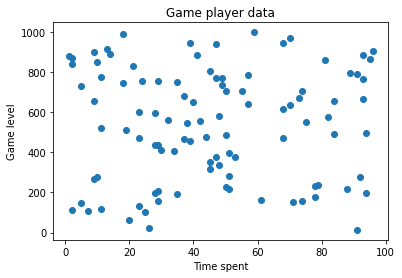

In [ ]:
# 게임유저를 게임시간과 레벨을 이용하여 산점도로 나타내보자. 
# X에는 게임시간, y에는 게임레벨이 들어간다
X = game_usage['time spent']
y = game_usage['game level']


# 게임 이용자 분석: 산포도 그래프
plt.title("Game player data")
plt.xlabel('Time spent')
plt.ylabel('Game level')
plt.scatter(X,y)
plt.show()




#### (3) 데이터 전처리

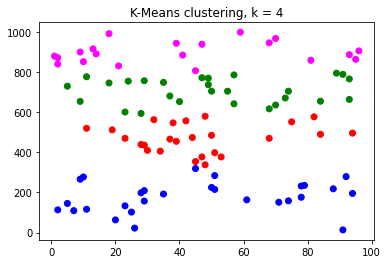

In [ ]:
# 게임하는 고객을 k-means를 이용해 군집화 

from sklearn import cluster

def kmeans_predict_plot(data, k):
    # k-means 분류기 만들고 data 분류하기
    model = cluster.KMeans(n_clusters = k)
    model.fit(data)  # 학습
    labels = model.predict(data)  

    # 결과를 산점도로 시각화하기
    colors = np.array(['red','green','blue','magenta'])
    plt.title(f'K-Means clustering, k = {k}')
    plt.scatter(data[:,0],data[:,1],color = colors[labels])

gamer_data = np.column_stack((X, y))
kmeans_predict_plot(gamer_data, k = 4)

(0.0, 1000.0)

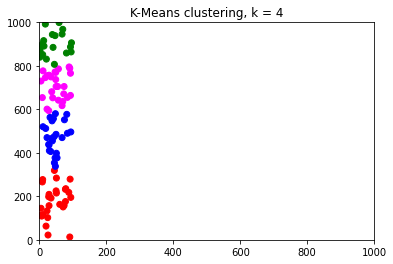

In [ ]:
# 거리를 기반으로 하는 데이터에서 x축의 표시범위와 y축의 표시범위를 보정해보면 
# 아래의 그래프의 군집화는 게임의 레벨에서만 분류가 일어났음을 알 수 있다. 

kmeans_predict_plot(gamer_data, k = 4)
plt.xlim(0, 1000);
plt.ylim(0, 1000)

#### 정규화(Normalization) : 0~1 사이가 되도록 바꿈
각각의 특징들의 값을 모두 0~1 사이의 범위가 되도록 동일한 규모로 변경하는 작업



In [ ]:
# 각각의 특징들의 값을 모두 0~1 사이의 범위가 되도록 동일한 규모로 변경하는 작업 : 정규화 (normalizarion)
# 최대, 최소값 스케일러
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(gamer_data)  # 컬럼별로 최대, 최소값 등 필요한 값 구하기
n_data = scaler.transform(gamer_data)  # 공식을 적용하여 값 변환


# 각 값들의 mean값 출력
n_data[:,0].mean(), n_data[:,1].mean()

(0.4731578947368421, 0.5324949290060852)

In [ ]:
# feature의 min, max값 출력

n_data[:,0].mean(), n_data[:,0].max()

(0.4731578947368421, 1.0)

In [ ]:
# target의 min, max값 출력
n_data[:,1].min(), n_data[:,1].max()


(0.0, 1.0)

#### (4) k-Means 군집화 수행

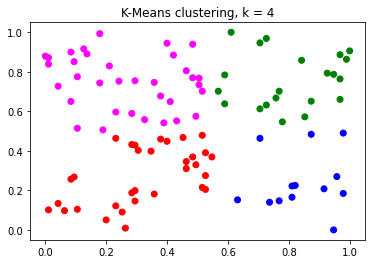

In [ ]:
# 4개의 군집 생성


kmeans_predict_plot(n_data, k = 4)


##다양한 스케일러 살펴보기

### 표준화(Standardization) : 평균 0, 분산 1인 정규분포데이터로 바꿈
데이터를 전체의 평균과 분산을 사용하여 정규분포화 하였을 때의 위치를 활용해 *x*로 바꾸면 *x*는 평균이 0이고 분산이 1인 데이터가 된다. 

In [ ]:
import numpy as np

a = np.array([10, 8, 10, 8, 8, 4])
print('합계 :', a.sum())
print('평균 :', a.mean())
print('분산 :', a.var())
print('표준편차 :', a.std())

합계 : 48
평균 : 8.0
분산 : 4.0
표준편차 : 2.0


In [ ]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(gamer_data)
gamer_data_scaled = standardScaler.transform(gamer_data)

gamer_data_scaled[:, 0].std(), gamer_data_scaled[:, 1].std()   #분산은 1

In [ ]:
gamer_data_scaled[:, 0].mean(), gamer_data_scaled[:, 1].mean() #평균이 거의 0

(-1.1435297153639113e-16, 1.1546319456101628e-16)

# 3.다양한 머신러닝 기법

## 서포트 벡터 머신(SVM) - 분류

### [1] 서포트 벡터 머신을 파이프라인을 사용하여 구현해 보기

In [ ]:
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

In [ ]:
import numpy as np

d = np.column_stack((dach_length, dach_height))
j = np.column_stack((jin_length, jin_height))
X = np.concatenate((d, j))   # 데이터 집합
y = [0]*len(d) + [1]*len(j)  # 레이블 집합
print('dogs :', X)
print('labels :', y)

dogs : [[55 30]
 [57 31]
 [64 36]
 [63 30]
 [58 33]
 [49 25]
 [54 37]
 [61 34]
 [56 52]
 [47 52]
 [56 50]
 [46 53]
 [49 50]
 [53 53]
 [52 49]
 [48 54]]
labels : [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm = Pipeline([ #표준 스케일러, 선형 SVM 분류기를 파이프라인에 넘겨줌
                ('scaler',StandardScaler()),
                ('linearSVC', LinearSVC(C=1,loss='hinge'))
                ])


svm.fit(X,y)  # 이 svm파이프라인에 X,y값을 넣어 학습시킴




Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge'))])

In [ ]:
dog_classes = {0:'Dachshund', 1:'Jindo dog'}
data1, data2 = [59, 35], [53, 54]


# data1 분류예측
y_pred = svm.predict([data1])
print('데이터 :', data1, ', 판정 결과:', dog_classes[y_pred[0]])

# data2 분류예측


print('데이터 :', data2, ', 판정 결과:', dog_classes[y_pred[0]])

데이터 : [59, 35] , 판정 결과: Dachshund
데이터 : [53, 54] , 판정 결과: Dachshund


### [2] 많은 데이터에 대하여 서포트 벡터 머신으로 분류하기

In [ ]:
import pandas as pd
import numpy as np

data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
df = pd.read_csv(data_loc + 'two_classes.csv')
df.tail(3)

,x1,x2,y
997,-4.634470,0.300158,0
998,1.426275,-2.765590,1
999,1.988053,1.466494,1


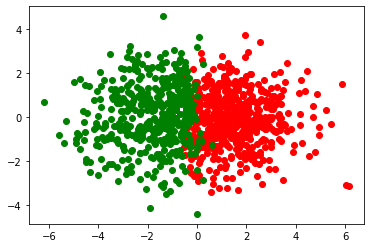

In [ ]:
df_positive = df[df['y']==1]     # y가 1인 데이터만 추출
df_negative = df[df['y']==0]     # y가 0인 데이터만 추출

import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
X = df[['x1', 'x2']].to_numpy()           # x1, x2를 입력 벡터로 한다
y = df['y']                               # y열의 값이 레이블 

# 파이프라인 구축 및 학습

svm = Pipeline([('scaler',StandardScaler()),
                ('linearSVC',LinearSVC(C=1,loss = 'hinge'))])

svm.fit(X,y)





/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge'))])

In [ ]:
# 예측
svm.predict([[0.12, 0.56], [-4, 40], [0, 40], [5,20]])

array([1, 0, 0, 1])

## 결정트리 (Decision Tree) : 분류, 회귀, 다중출력까지 가능


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
# DecisionTree Classifier 만들기 (의사결정나무 분류기 만들기)

from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth = 3)
dec_tree.fit(X,y)



DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
  dec_tree,
  out_file=("./dec_tree_for_iris.dot"),
  feature_names=iris.feature_names,
)

!ls

dec_tree_for_iris.dot  game_usage.csv  penguine.png  sample_data


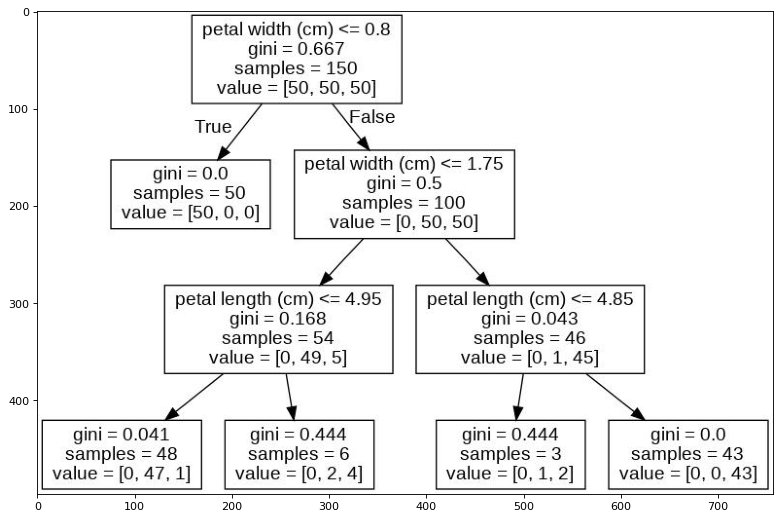

In [ ]:
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt   # 이미지 읽어들임
dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80, 
           facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

## 차원축소 

### 3차원 공간의 데이터에서 주성분 찾기

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt

In [ ]:
u = np.array([1,1,1]) / np.sqrt(3)
v = np.array([1,0,-1]) / np.sqrt(2)

# 1000개의 데이터 셋 생성하기
n_data = 1000
X = []
for _ in range(n_data) :
    r_coeff = np.random.randn(2,)
    data = 2.0* r_coeff[0] * u + r_coeff[1] * v + 0.1 * np.random.rand(3,)
    X.append(data)

X = np.array(X)

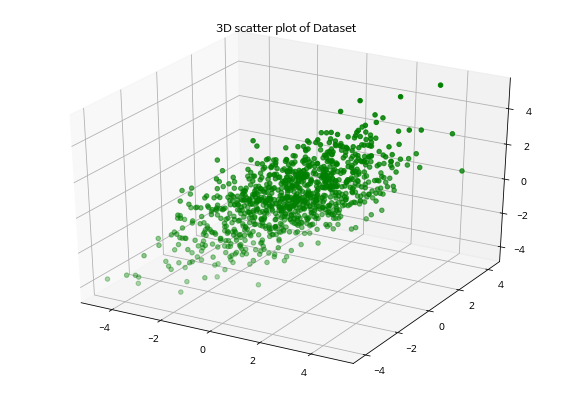

In [ ]:
# 가시화를 위한 맷플롯립 figure 만들기
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# 3차원 공간에 데이터 가시화
ax.scatter3D(X[:,0], X[:,1], X[:,2], color = "green")
plt.title("3D scatter plot of Dataset")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

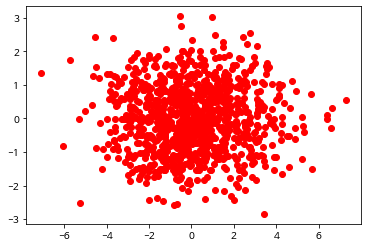

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_2d_sklearn = pca.fit_transform(X)
plt.scatter(X_2d_sklearn[:, 0], X_2d_sklearn[:, 1], color='r')
plt.show()

### 4차원 공간에 존재하는 붓꽃 데이터를 2차원에서 분류해 보자

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
from sklearn.preprocessing import StandardScaler
features = iris['feature_names']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
x

In [ ]:





principalDf = pd.DataFrame(data = pca_result, columns = ['PC1', 'PC2'])
principalDf, df['target']

In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf

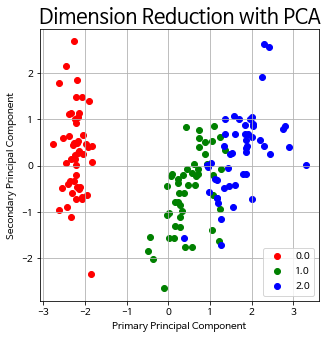

In [ ]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Primary Principal Component')
ax.set_ylabel('Secondary Principal Component')
ax.set_title('Dimension Reduction with PCA', fontsize = 20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    idx = finalDf['target'] == target
    ax.scatter(finalDf.loc[idx, 'PC1'] , finalDf.loc[idx, 'PC2']
               , c = color)
ax.legend(targets)
ax.grid()

###실습 2 . 2차원으로 차원축소를 거친 붓꽃 데이터를 이용하여 2단계 결정트리를 만들고 노드들의 순도를 확인해보자

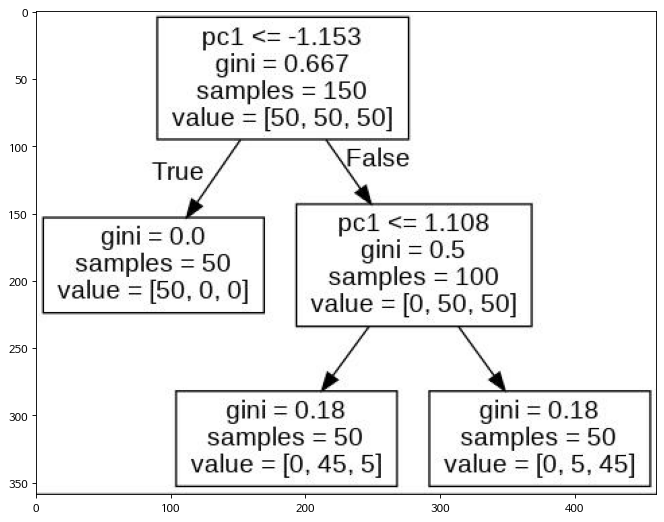

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

features = iris['feature_names']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
pca_result  = pca.fit_transform(x)

dec_tree = DecisionTreeClassifier(max_depth=2)
dec_tree.fit(pca_result, y)

DecisionTreeClassifier(max_depth=2)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
  dec_tree,
  out_file=("./dec_tree_for_iris_pca.dot"),
  feature_names=['pc1', 'pc2'],
)

!ls

dec_tree_for_iris.dot  dec_tree_for_iris_pca.dot  penguine.png
dec_tree_for_iris.jpg  game_usage.csv		  sample_data


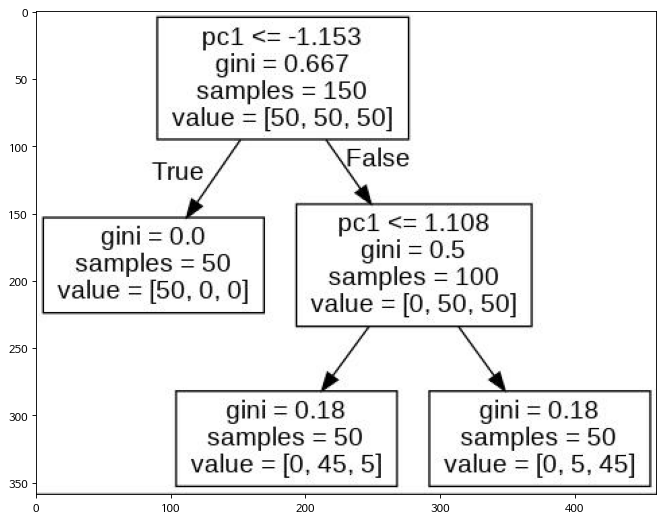

In [ ]:
!dot -Tjpg dec_tree_for_iris_pca.dot -o dec_tree_for_iris_pca.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread('./dec_tree_for_iris_pca.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80, 
           facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)